<a href="https://colab.research.google.com/github/MakkaiNandor/IntelligensModszerekTantargy/blob/main/Elofeldolgozas_es_vizualizacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline ### most nem kell, de maskor jol johet :-)

**Adatok betöltése**

In [4]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data_with_errors.txt', header=0, sep='\t')

In [5]:
data

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
0,2018.06.03,00:03,01:16,17.0,15.0,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1
1,2018.06.03,08:20,09:29,19.0,24.0,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2
2,2018.06.03,13:00,15:00,30.0,28.0,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3
3,2018.06.04,15:30,16:30,29.0,28.0,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1
4,2018.06.04,18:18,19:10,30.0,25.0,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018.09.03,22:00,22:55,21.0,19.0,off,normal,bp-dujv,68.2,5.3,78,00:52,95+,highway,1
99,2018.09.04,06:42,07:55,16.0,17.0,off,normal,dujv-bp,69.1,4.5,58,01:10,95+,highway,1
100,2018.09.04,20:00,21:10,17.0,16.0,off,low,bp-dujv,71.6,4.5,65,01:05,95+,highway,1
101,2018.09.05,08:15,09:25,15.0,20.0,off,normal,dujv-bp,71.7,4.7,62,01:09,95+,highway,1


**DataFrame oszlopai**

In [6]:
data['starttemp']  # egy oszlopra jol olvashatoan hivatkozhatunk az oszlop nevevel

0      17.0
1      19.0
2      30.0
3      29.0
4      30.0
       ... 
98     21.0
99     16.0
100    17.0
101    15.0
102    21.0
Name: starttemp, Length: 103, dtype: float64

In [7]:
list(data) # oszlopnevek listaja

['date',
 'starttime',
 'endtime',
 'starttemp',
 'endtemp',
 'air conditioner',
 'trafic',
 'route',
 'dist',
 'avg.cons.',
 'speed',
 'duration',
 'fuel type',
 'road',
 'num. persons']

**Hiányzó értékek (missing values)**

In [8]:
data['starttemp'].isnull() 
# egy DataFrame típusú True-False vektort ad. 
# Az ertek attol fuggoen True vagy False, hogy 
# az adott peldany eeseteben a cella erteke null-e 
# (azaz hianyzo ertek-e)

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100    False
101    False
102    False
Name: starttemp, Length: 103, dtype: bool

In [9]:
data['starttemp'].isnull().sum() 
# összeadasnal: True=1, False=0
# Igy tehat a hianyzo ertekek szamat kapjuk

5

*1. feladat*

Írjon egy for ciklust, amely kiszámolja és kiírja a hiányzó értékek számát minden egyes attribútumra (oszlopra). A hiányzó értékek számával együtt az oszlop nevét is írja ki.

In [11]:
for oszlop in list(data):
  print(f"{oszlop:15} {data[oszlop].isnull().sum():3}")

date              0
starttime         0
endtime           0
starttemp         5
endtemp           4
air conditioner   0
trafic            0
route             0
dist              1
avg.cons.         0
speed             0
duration          0
fuel type         0
road              0
num. persons      0


*2. feladat*

Készítsen másolatot az adatról, és a másolatban helyettesítse a *starttemp* oszlop hiányzó értékeit 

(a) a starttemp átlagos értékével,

(b) a starttemp mediánjával.

(c) Írjon egy for ciklust, amely az összes oszlop esetén helyettesíti a hiányzó értékeket az adott oszlop átlagával, ahol ez lehetséges!

In [16]:
data_copy = data.copy()
starttemp_is_null = data_copy['starttemp'].isnull()
starttemp_avg = data_copy['starttemp'].mean()
data_copy['starttemp'][starttemp_is_null] = starttemp_avg

In [18]:
data_copy = data.copy()
starttemp_is_null = data_copy['starttemp'].isnull()
starttemp_median = data_copy['starttemp'].median()
data_copy['starttemp'][starttemp_is_null] = starttemp_median

In [29]:
data_copy = data.copy()
for oszlop in list(data_copy):
  try:
    oszlop_avg = data_copy[oszlop].mean()
    oszlop_is_null = data_copy[oszlop].isnull()
    data_copy[oszlop][oszlop_is_null] = oszlop_avg
    print(f"{oszlop:15} {oszlop_avg}")
  except Exception:
    print(f"{oszlop:15} exception")

date            exception
starttime       exception
endtime         exception
starttemp       22.744897959183675
endtemp         24.454545454545453
air conditioner exception
trafic          exception
route           exception
dist            68.77156862745096
avg.cons.       5.229126213592232
speed           61.80582524271845
duration        exception
fuel type       exception
road            exception
num. persons    1.3009708737864079


A következőkben egy diagramon fogjuk ábrázolni az egyes utazások esetében az induláskori és érkezéskori hőmérsékletet. Csak azokat az utazásokat fogjuk használni, ahol az eredeti adatban mind a két hőmérsékleti érték adott. Először a scatterplottal ismerkedünk.

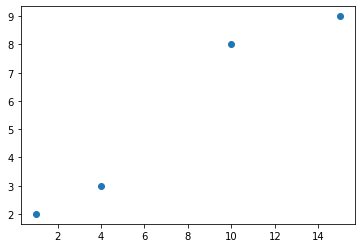

In [31]:
# 1 2
# 4 3 
# 10 8
# 15 9
x = [1, 4, 10, 15]
y = [2, 3, 8, 9]
plt.scatter(x,y);

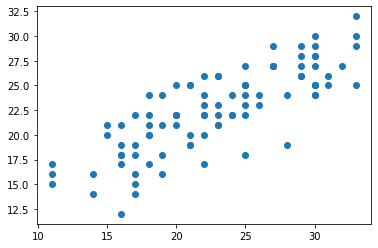

In [32]:
both_values_present = np.logical_and(data['starttemp'].isnull()==False,
                                     data['endtemp'].isnull()==False)
both_values_valid = np.logical_and(both_values_present, data['endtemp'] < 100)
plt.scatter( data[both_values_valid]['starttemp'], 
            data[both_values_valid]['endtemp'] )
plt.show()

*3. feladat*

Az érkezéskori hőmérséklet jobb becslés lehet az indulási hőmérsékletre, mint az összes induláskori hőmérséklet átlaga, és fordítva: amikor az érkezéskori hőmérséklet hiányzik, az induláskori hőmérséklet lehet egy jó becslés. 

(a) Írjon egy olyan kódot, amely ellenőrzi, hogy van-e olyan eset, amikor egyszerre hiányzik az induláskori és érkezéskori hőmérséklet!

(b) Amikor az **indulási** hőmérséklet hiányzik, helyettesítse azt az érkezéskori hőmérséklettel!

(c) Amikor csak az **érkezéskori** hőmérséklet hiányzik, helyettesítse azt az induláskori hőmérséklettel!


In [35]:
both_values_missing = np.logical_and(data['starttemp'].isnull(), data['endtemp'].isnull())
both_values_missing.sum()

0

In [39]:
data_copy = data.copy()
starttemp_is_missing = data_copy['starttemp'].isnull()
data_copy['starttemp'][starttemp_is_missing] = data_copy['endtemp'][starttemp_is_missing]
data_copy[starttemp_is_missing]

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
14,2018.06.11,13:32,14:14,29.0,29.0,on,low,ercsi-dujv,36.7,4.5,53,00:41,FS,standard,1
21,2018.06.20,17:30,18:26,28.0,28.0,on,normal,szfvar-dujv,53.2,5.5,58,00:55,95+,standard,1
31,2017.06.28,08:25,09:30,20.0,20.0,off,normal,dujv-bp,NaN,5.0,67,01:02,95FS,highway,1
58,2018.07.18,18:30,19:33,19.0,19.0,off,normal,bp-dujv,71.8,5.0,66,01:04,95FS,highway,1
75,2018.08.09,09:15,10:15,29.0,29.0,on,low,dujv-bp,69.7,5.2,70,00:59,95+,highway,1


In [41]:
endtemp_is_missing = data_copy['endtemp'].isnull()
data_copy['endtemp'][endtemp_is_missing] = data_copy['starttemp'][endtemp_is_missing]
data_copy[endtemp_is_missing]

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons
52,2018.07.10,08:30,09:35,22.0,22.0,off,normal,dujv-bp,70.7,5.0,72,00:59,95FS,highway,1
55,2018.07.11,21:00,22:07,18.0,18.0,off,low,bp-dujv,72.1,4.4,63,01:08,95FS,highway,1
62,2018.07.23,18:00,19:00,20.0,20.0,off,normal,bp-dujv,69.9,5.0,77,00:54,95FS,highway,1
95,2018.09.02,10:36,11:35,22.0,22.0,on,normal,dujv-bp,71.6,5.4,76,00:56,95FS,highway,1


*4. feladat*

Lehetséges, hogy az indulási és érkezéskori hőmérséklet különbsége összefügg azzal, hogy mikor kerül sor az utazásra (reggel nagyobb az érkezéskori hőmérséklet, este pedig kisebb). A következőkben ezt fogjuk megvizsgálni.

(a) Vezessen be egy új oszlopot, ami a két hőmérséklet különbségét tartalmazza.

In [44]:
data['temp_diff'] = data['endtemp'] - data['starttemp']
data[['starttemp', 'endtemp', 'temp_diff']]

,starttemp,endtemp,temp_diff
0,17.0,15.0,-2.0
1,19.0,24.0,5.0
2,30.0,28.0,-2.0
3,29.0,28.0,-1.0
4,30.0,25.0,-5.0
...,...,...,...
98,21.0,19.0,-2.0
99,16.0,17.0,1.0
100,17.0,16.0,-1.0
101,15.0,20.0,5.0


(b) Vezessen be egy új oszlopot, ami azt tartalmazza számként, hogy a nap melyik órájában kerül sor az utazásra! Ezt az információt a *starttime* oszlopban található string első két karakteréből "hámozza ki".

In [45]:
data['hour'] = 0
for i in range(len(data)):
  data['hour'][i] = int(data['starttime'][i][0:2])

In [46]:
data[['starttime', 'hour']]

,starttime,hour
0,00:03,0
1,08:20,8
2,13:00,13
3,15:30,15
4,18:18,18
...,...,...
98,22:00,22
99,06:42,6
100,20:00,20
101,08:15,8


A következőkben csoportosítjuk az egyes utazásokat aszerint, hogy a nap melyik órájában kerül sor az utazásra, majd csoportonként kiszámoljuk az előbbiekben bevezetett *temp_diff* mediánját, amelyet az óra függvényében ábrázolunk.

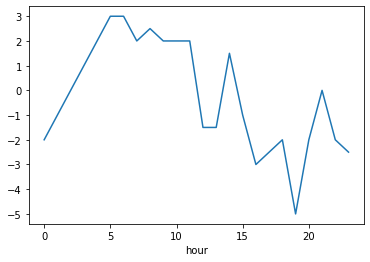

In [48]:
data.groupby('hour')['temp_diff'].median().plot()

*5. feladat*

(a) Helyettesítse a **starttemp** hiányzó értékeit az **endtemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)!

In [ ]:
# ...IDE JÖN A KÓD...

(b) Helyettesítse az **endtemp** hiányzó értékeit a **starttemp** hozzátartozó értékével úgy, hogy közben korrigál a két hőmérséklet közötti "szokásos" különbséggel (az előbb kiszámolt mediánnal)! Miben különbözik a megoldás az előbbi részfeladat megoldásától?

In [ ]:
# ...IDE JÖN A KÓD...

*6. feladat*

Diszkusszió: hogyan töltené ki a távolság hiányzó értékét?

In [ ]:
# ...IDE JÖN A KÓD...

**Duplikátumok keresése**

*7. feladat*

Az úgynevezett **egzakt duplikátumok** (amikor pontosan ugyanaz a példány/rekord ismétlődik) eliminálása tipikusan két lépésben történik: az első lépésben az adatokat rendezzük, ezáltal a duplikátumok egymást követően helyezkednek el az adattáblában. A második lépésben az egymást követő példányokról döntjük el, hogy azonosak-e.
Az esetünkben az adattábla eredetileg is rendezett.

(a) Írjon egy olyan függvényt, amely az adattábla *i*-dik példányáról (*i* a függvény argumentuma) eldönti, hogy azonos-e az *(i+1)*-dik példánnyal.

In [ ]:
# ...IDE JÖN A KÓD...

(b) Az előbbi függvény felhasználásával írjon egy olyan szkriptet, amely az adattábla minden egyes példányáról eldönti, hogy megtartantó-e, azaz különbözik-e a következő példánytól. Eredményként egy True/False értékekből álló listát várunk, amelyben True azt jelöli, hogy a példányt megtartjuk, False pedig azt, hogy eldobjuk, mert egy másik példány azonos vele.

In [ ]:
# ...IDE JÖN A KÓD...

A deduplikált adattábla:

In [ ]:
data_dedup = pd.DataFrame(data[keep])
data_dedup

**Inkonzisztens értékek**

*8. feladat*

(a) Vizsgálja meg, hogy az adattábla *air conditioner* oszlopa milyen értékeket vesz fel, melyiket hányszor. Segítség: használjon *groupby*-t és *count*-ot!

In [ ]:
# ...IDE JÖN A KÓD...

(b) Helyettesítse az "offf" értékeket "off"-fal!

In [ ]:
# ...IDE JÖN A KÓD...

(c) Helyettesítse az "onn" értékeket "on"-nal!

In [ ]:
# ...IDE JÖN A KÓD...    

(d) Helyettesítse az "oof" értékeket "off"-fal!

In [ ]:
# ...IDE JÖN A KÓD...

**Leíró statisztikák**

Betöltjük a helyes adatokat:

In [ ]:
data = pd.read_csv('http://www.biointelligence.hu/mi/fuel_data.txt', header=0, sep='\t')

*9. feladat*

Számolja ki a kezdeti hőmérséklet

(a) minimumát és maximumát,

(b) 25%-os és 75%-os percentiliseit,

(c) és szórását!

(d) Írjon egy függvényt, amellyel bármelyik oszlop amplitúdója (maximumának és 
    minimumának különbsége) meghatározható!

(e) Írjon egy függvényt, amely meghatározza az alsó és felső kvartilisek távolságát!

(Segítség: használja a numpy függvényeit!)

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

**Diagramok**

In [ ]:
data["starttemp"].hist();

*10. feladat*

A "pandas DataFrame" dokumentációját és/vagy interneten elérhető forrásokat felhasználva módosítsa az előbbi kódot úgy, hogy a hisztogram oszlopainak száma ne 10, hanem 20 legyen!

In [ ]:
# ...IDE JÖN A KÓD...

*11. feladat*

Határozza meg, hány esetben volt a légkondi 

(a) bekapcsolva (ac_on), illetve

(b) kikapcsolva (ac_off).

In [ ]:
# ...IDE JÖN A KÓD...

In [ ]:
# ...IDE JÖN A KÓD...

A következőkben a légkondi ki- és bekapcsoltságát fogjuk különböző diagramokon ábrázolni.

In [ ]:
plt.bar([2,1], [ac_on, ac_off], tick_label=["bekapcs","kikapcs"], color=["b","g"]);

# plt.show() # most nem kell, de máskor jól jöhet :-)

In [ ]:
plt.pie( [ac_on, ac_off], labels=["on", "off"]);

Kezdőhőmérséklet eloszlása boxplot-on:

- középső vonal: median
- doboz teteje: felso kvartilis (75%-os percentilis)
- doboz alja: also kvartilis (25%-os percentilis)
- felső vonal: median + 1.5*(interquartile range), de legfeljebb a legnagyobb érték
- alsó vonal: median - 1.5*(interquartile range), de nem kisebb a legkisebb értéknél 
- outlierek: karikák az alsó és felső vonal alatt ill. felett
- alsó és felső vonalnál az 1.5-ös szorzó állítható, ld. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html 



In [ ]:
plt.boxplot(data['starttemp'], notch=True);

In [ ]:
plt.boxplot([ data[data['fuel type'] =='95FS']['avg.cons.'], 
              data[data['fuel type'] =='95+']['avg.cons.'] ],
              labels = ['95FS', '95+']);

**Szélsőséges értékek kezelése**

Egy egyszerű eljárás a szélsőséges értékek kezelésére: kihagyjuk őket. Felrajzoljuk példaként az előbbi boxplot-okat a 10l/100km-es fogyasztásnál nagyobb fogyasztásokat kihagyva.

In [ ]:
plt.boxplot([ data[(data['fuel type'] =='95FS') & (data['avg.cons.']<10)]['avg.cons.'], 
              data[(data['fuel type'] =='95+')  & (data['avg.cons.']<10)]['avg.cons.'] ],
             labels = ['95FS', '95+']);

**Korreláció**

In [ ]:
np.corrcoef(data['starttemp'], data['endtemp'])

*12. feladat*

Írja meg azt a kódot, amely megadja kiszámolja a korrelációmátrixot a sebesség és az üzemanyagfogyasztás között!

In [ ]:
# ...IDE JÖN A KÓD...

**Scatterplottól a többdimenziós ábrákig**

In [ ]:
plt.scatter(data['speed'], data['avg.cons.']);

A következő ábrán színekkel jelöljük a forgalmi viszonyokat, de csak azokat az eseteket ábrázoljuk, ahol a fogyasztás 10l/100km alatti

In [ ]:
relevant_data = data[data['avg.cons.']<10]

colors = []
for tr in relevant_data['trafic']:
    if tr == 'low':
        colors.append('g')
    elif tr == 'normal':
        colors.append('b')
    else: 
        colors.append('r')
        
plt.scatter(relevant_data['speed'],
            relevant_data['avg.cons.'],
            c = colors);

*13. feladat*

Hozzon létre egy új attribútumot (oszlopot), amely az átlagos hőmérsékletet (indulási és érkezéskori hőmérsékletek átlagát) tartalmazza!

In [ ]:
data['temp'] = # ...IDE JÖN A KÓD...

A következőkben egy 3D ábrán egyszerre fogjuk ábrázolni a sebességet, fogyasztást és a hőmérsékletet.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'])
plt.show()



...szín segítségével megjelenítjük az üzemanyag típusát:



In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else: 
        colors.append('b')
ax.scatter(data['speed'], data['avg.cons.'], data['temp'], c = colors)
ax.set_xlabel('speed')
ax.set_ylabel('avg.cons')
ax.set_zlabel('temp')
plt.show()

...a jelölő (marker) típusával pedig a forgalmi viszonyokat:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = []
m=[]
for i in range(len(data)):
    if data['fuel type'][i]=='95+':
        colors.append('r')
    else: 
        colors.append('b')
        
for j in range(len(data)):
    if data['trafic'][j] =='low':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j], 
           c = colors[j], marker = 'o') 
    elif data['trafic'][j] =='normal':
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j], 
           c = colors[j], marker = 'x') 
    else:
        ax.scatter(data['speed'][j], data['avg.cons.'][j], data['temp'][j], 
           c = colors[j], marker = '^') 
plt.show()

**Összefoglalás**

Tipikus előfeldolgozási (adattiszttítási) lépések:
- Hiányzó értékek kezelése
- Duplikátumok eliminálása
- Inkonzisztens (hibás) értékek javítása
- Adatok kiválasztása: a későbbi elemzés szempontjából lényeges sorok=példányok=rekordok kiválasztása, valamint oszlopok=attribútumok=leírók=feature-k kiválasztása, új attribútumok létrehozása (pl. 'temp'), dimenzionalitás csökkentése (pl. PCA-val, nem volt róla szó).  
- Normalizálás (nem volt róla szó)
- Szélsőséges értékek keresése

Az előfeldolgozás közben (vagy akár előtte ill. utána is) hasznos az adatainkat ábrázolni, különféle leíró statisztikákat számolni, hogy minél jobban megértsük az adatokat.

Az előfeldolgozási lépések projektről-projektre változhatnak, mindig azt használjuk, ami az adott esetben ésszerű! Nem volt szó domain-specifikus előfeldolgozáról (pl. képek esetén azonos felbontásra alakításról).